In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv(r"./InstagramData.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

We start the task of analyzing the reach of the Instagram account by importing the necessary Python libraries and the dataset.

In [2]:
#Check for null values in the dataset
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

Here, we take a look at whether this dataset contains any null values or not.

In [3]:
#Drop all null values
data = data.dropna()

Now we drop all these null values.

In [4]:
#Data types of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


This is the description for the attributes in the dataset.

## Exploratory Data Analysis

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20216\584923843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


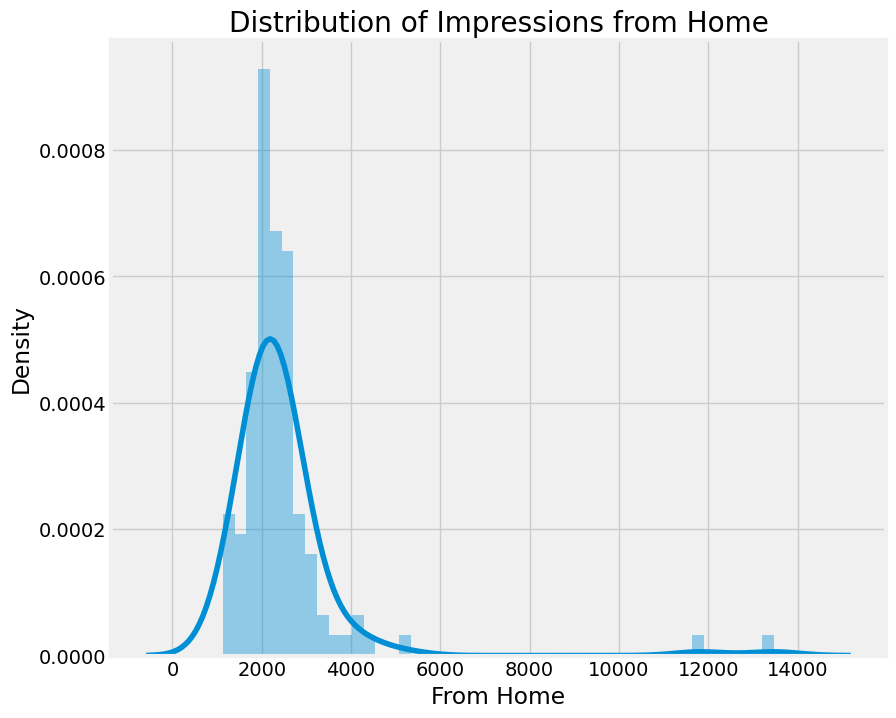

In [5]:
#Distribution of impressions received from home
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Home")
sns.distplot(data['From Home'])
plt.show()

Distribution of impressions received from home.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20216\2479137021.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])


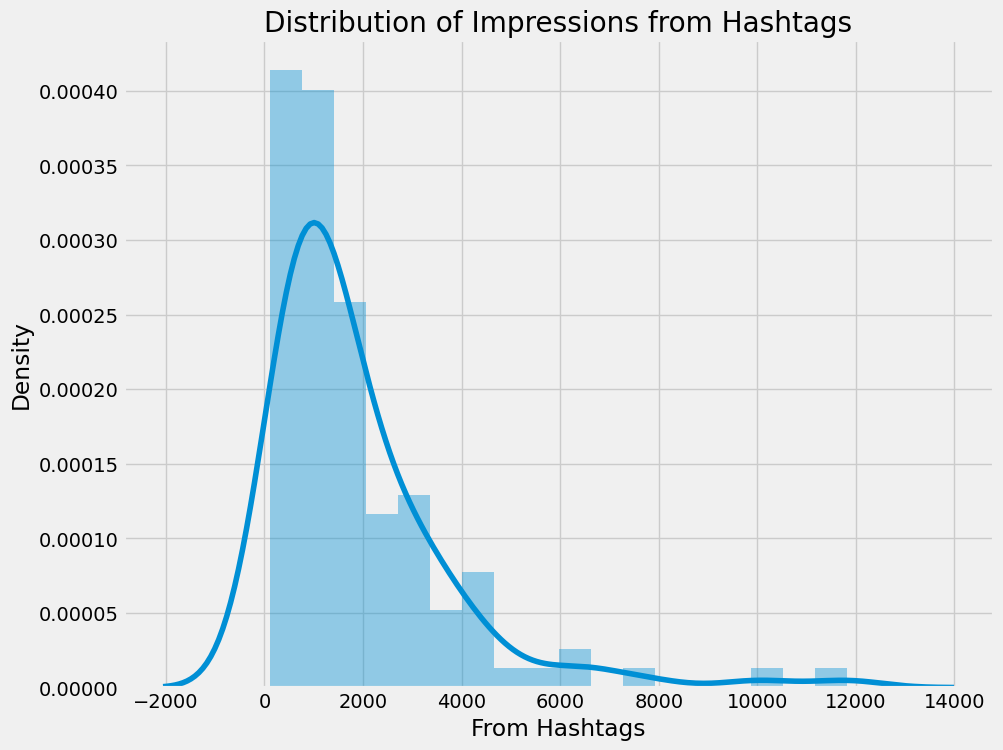

In [6]:
#Distribution of impressions received from hashtags
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions from Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

Distribution of impressions received from hashtags.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20216\686763784.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


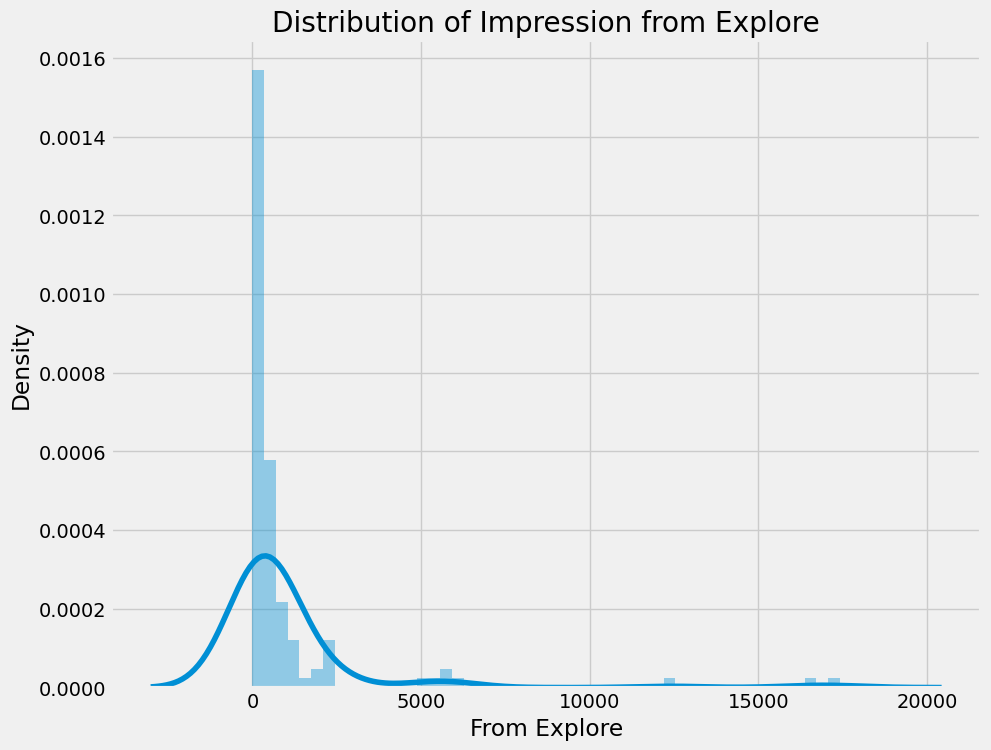

In [7]:
#Distribution of impressions received from explore section
plt.figure(figsize=(10,8))
plt.title("Distribution of Impression from Explore")
sns.distplot(data['From Explore'])
plt.show()

Distribution of impressions received from explore section.

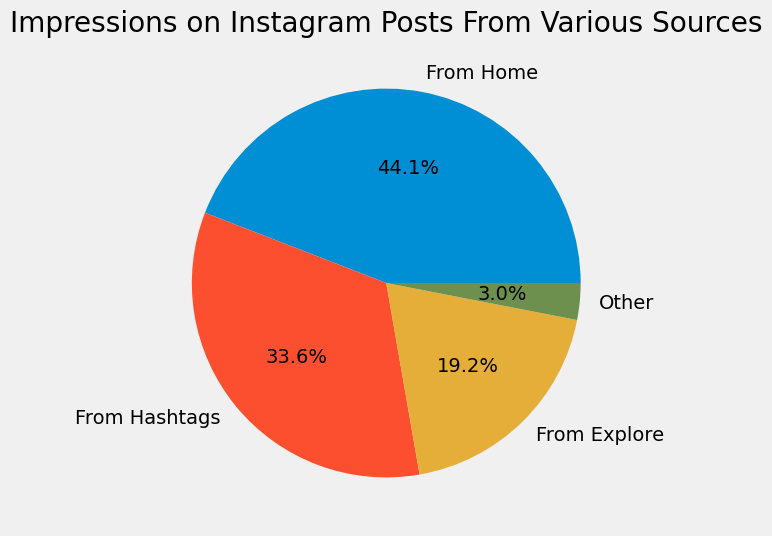

In [8]:
#Percentage  of impressions from various sources
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

plt.figure(figsize=(8,6))
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.title("Impressions on Instagram Posts From Various Sources")
plt.show()

Now we take a look at the percentage of impressions from various sources.

## We start analysing the content of the Instagram posts from here on.

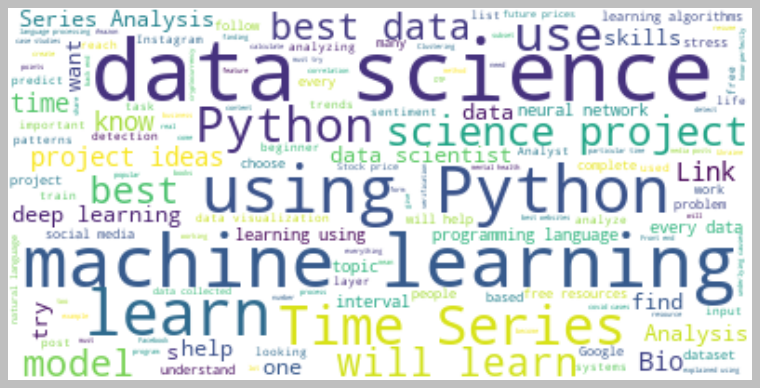

In [9]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Wordcloud of the most used words in the caption of the account's Instagram posts.

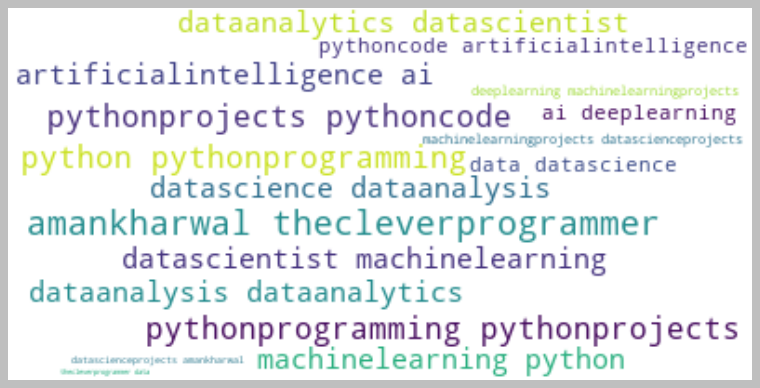

In [10]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color= "white").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Wordcloud of the most used words in the hashtags of the account's Instagram posts

## Analysing relationships

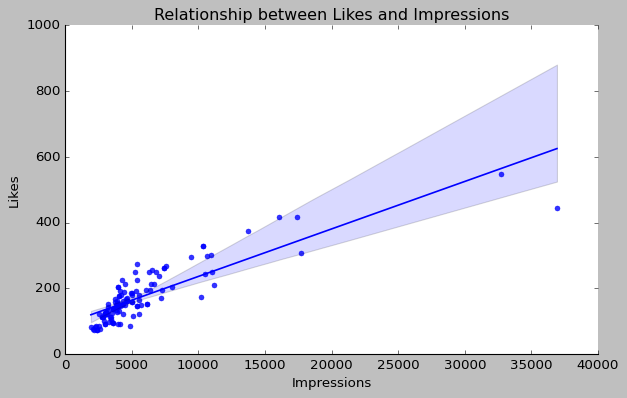

In [11]:
#Relationship between the number of likes and number of impressions 
sns.lmplot(x="Impressions", y="Likes", data=data, height = 5, aspect = 8/5)
plt.title("Relationship between Likes and Impressions")
plt.show()

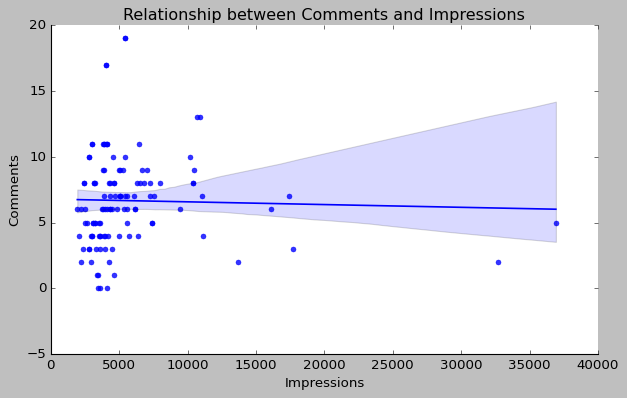

In [12]:
#Relationship between the number of comments and number of impressions
sns.lmplot(x="Impressions", y="Comments", data=data, height = 5, aspect = 8/5)
plt.title("Relationship between Comments and Impressions")
plt.show()

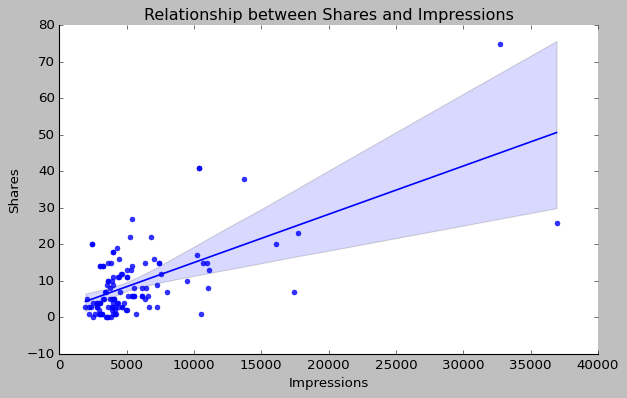

In [13]:
#Relationship between the number of shares and number of impressions
sns.lmplot(x="Impressions", y="Shares", data=data, height = 5, aspect = 8/5)
plt.title("Relationship between Shares and Impressions")
plt.show()

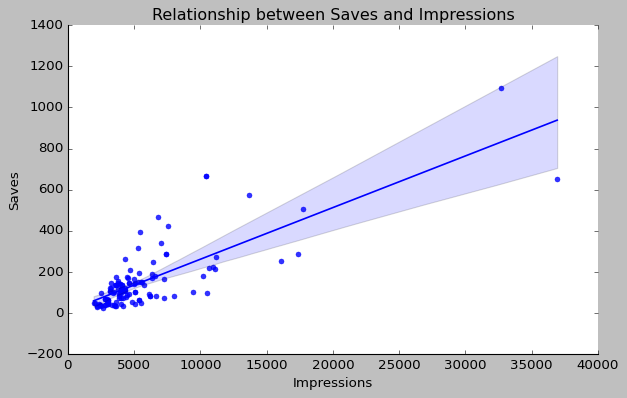

In [14]:
#Relationship between the number of saves and number of impressions
sns.lmplot(x="Impressions", y="Saves", data=data, height = 5, aspect = 8/5)
plt.title("Relationship between Saves and Impressions")
plt.show()

In [15]:
#Correlation of all the attributes with Impressions
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20216\3605797144.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20216\2403024481.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


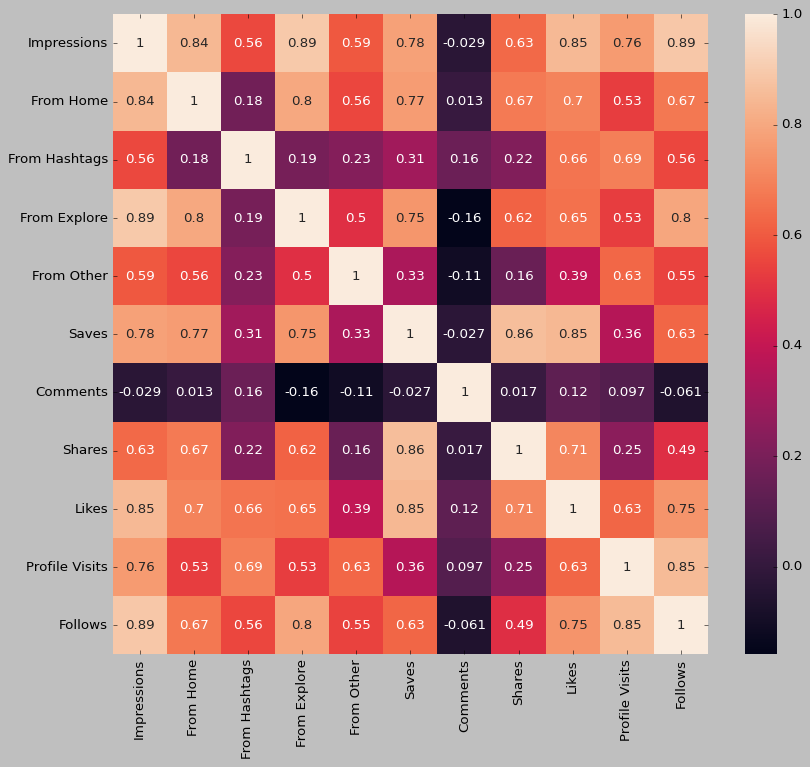

In [16]:
#Correlation matrix of the dataframe
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [17]:
#Analysing conversion rate
#Conversion rate is the number of followers you get
# from the number of profile visits from a post
#Conversion Rate = (Follows/Profile Visits) * 100
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


Conversion rate is the number of followers you get from the number of profile visits from a post.<br/>
Conversion Rate = (Follows/Profile Visits) * 100

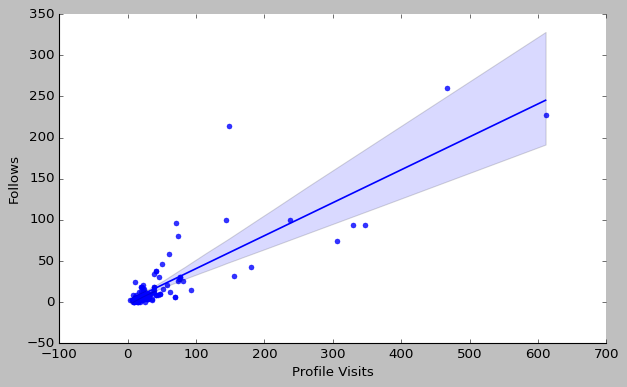

In [18]:
#Relationship between total profile visits and number of followers gained
sns.lmplot(x="Profile Visits", y="Follows", data=data, height = 5, aspect = 8/5)

## Instagram reach prediction model

In [19]:
#Splitting data into training and test sets
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares',
                    'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

The test-train split is 20% - 80%

In [20]:
#How to Train a machine learning model to predict reach of an Instagram post
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8314286051675326

The r2 score comes out to be 0.83

In [21]:
#Training a machine learning model to predict reach of an Instagram post
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([9479.71088958])

The model predicts the reach of the Instagram post to be 11874 accounts based on the input parameters.